In [ ]:
1. NumPy
Los datos importados se almacenan en una matriz.
• Mismo tipo de datos.
La función loadtxt() de NumPy carga el archivo en una matriz.
El delimitador por defecto es espacio en blanco, si es otro habrá que pasarlo como
segundo argumento delimiter (‘,’ en el caso de coma, ‘\t’ si es tabulador…).
Si el archivo tiene cabecera podemos saltar las filas correspondientes con skiprows
(pasar el valor 0 es equivalente a omitir este argumento, devolviendo todas las filas).
Para fijar las columnas pasamos el argumento usecols=[…] con sus índices, recordando
que a la primera columna corresponde el índice 0.

In [7]:
import numpy as np
import pandas as pd

In [15]:
file='Toyota.txt'
data=np.loadtxt(file,delimiter='\t',skiprows=1,usecols=[0,1,2])
data

array([[1.3500e+04, 2.3000e+01, 4.6986e+04],
       [1.3750e+04, 2.3000e+01, 7.2937e+04],
       [1.3950e+04, 2.4000e+01, 4.1711e+04],
       ...,
       [8.5000e+03, 7.1000e+01, 1.7016e+04],
       [7.2500e+03, 7.0000e+01, 1.6916e+04],
       [6.9500e+03, 7.6000e+01, 1.0000e+00]])

In [16]:
file='toyota.txt'
data2=np.loadtxt(file,delimiter='\t',skiprows=1,dtype=bytes).astype(str)
data2

array([['13500', '23', '46986', ..., '2000', '3', '1165'],
       ['13750', '23', '72937', ..., '2000', '3', '1165'],
       ['13950', '24', '41711', ..., '2000', '3', '1165'],
       ...,
       ['8500', '71', '17016', ..., '1300', '3', '1015'],
       ['7250', '70', '16916', ..., '1300', '3', '1015'],
       ['6950', '76', '1', ..., '1600', '5', '1114']], dtype='<U6')

In [31]:
file='toyota.txt'
data2=np.loadtxt(file,delimiter='\t',skiprows=0,dtype=bytes).astype(str)
data2

array([['Price', 'Age', 'KM', ..., 'CC', 'Doors', 'Weight'],
       ['13500', '23', '46986', ..., '2000', '3', '1165'],
       ['13750', '23', '72937', ..., '2000', '3', '1165'],
       ...,
       ['8500', '71', '17016', ..., '1300', '3', '1015'],
       ['7250', '70', '16916', ..., '1300', '3', '1015'],
       ['6950', '76', '1', ..., '1600', '5', '1114']], dtype='<U9')

In [ ]:
Diferente tipo de datos.
Si en nuestro archivo tenemos datos de diferentes tipos, podemos usar dos funciones:
genfromtext() y recfromcsv().
genfromtext():
Cuando exista cabecera, especificaremos names=True.
Al pasar el argumento dtype=None, la función averigua qué tipo corresponde a cada
columna.

In [32]:
file='ToyotaCorolla.csv'
data3=np.genfromtxt('ToyotaCorolla.csv', delimiter='\t',names=True,dtype=object)
data3

rec.array([(b'13500,23,46986,Diesel,90,1,0,2000,3,1165',),
           (b'13750,23,72937,Diesel,90,1,0,2000,3,1165',),
           (b'13950,24,41711,Diesel,90,1,0,2000,3,1165',), ...,
           (b'8500,71,17016,Petrol,86,0,0,1300,3,1015',),
           (b'7250,70,16916,Petrol,86,1,0,1300,3,1015',),
           (b'6950,76,1,Petrol,110,0,0,1600,5,1114',)],
          dtype=[('priceagekmfueltypehpmetcolorautomaticccdoorsweight', 'O')])

In [33]:
file='ToyotaCorolla.csv'
data3=np.recfromcsv('ToyotaCorolla.csv', delimiter='\t',names=True,dtype=object)
data3

rec.array([(b'13500,23,46986,Diesel,90,1,0,2000,3,1165',),
           (b'13750,23,72937,Diesel,90,1,0,2000,3,1165',),
           (b'13950,24,41711,Diesel,90,1,0,2000,3,1165',), ...,
           (b'8500,71,17016,Petrol,86,0,0,1300,3,1015',),
           (b'7250,70,16916,Petrol,86,1,0,1300,3,1015',),
           (b'6950,76,1,Petrol,110,0,0,1600,5,1114',)],
          dtype=[('priceagekmfueltypehpmetcolorautomaticccdoorsweight', 'O')])

In [ ]:
En la salida podemos observar que las variables tipo cadena están precedidas por una
‘b’. Este carácter sólo indica que la cadena es de tipo ‘bytestring’, el valor almacenado
es la cadena entre comillas simples.

Al contener datos de diferente tipo, el archivo importado será un objeto llamado matriz
estructurada. Como las matrices NumPy han de contener elementos del mismo tipo, la
matriz estructurada es unidimensional, donde cada uno de sus elementos corresponde
a una fila del fichero plano importado.

El acceso a una matriz estructurada es muy intuitivo. Así:
• Filas (por índice): data[i] > fila i-ésima
• Columnas (por nombre): data[‘Nombre_columna’]
    
recfromcsv():
Análoga a la anterior, excepto que su valor por defecto para dtype es ‘None’.
Probemos a obtener el mismo resultado que en la ejecución anterior, pero limitando la
impresión de datos a las 3 primeras filas.

In [37]:
file='ToyotaCorolla.csv'
data4=np.recfromcsv(file)
data4[:3]

rec.array([(13500, 23, 46986, b'Diesel', 90, 1, 0, 2000, 3, 1165),
           (13750, 23, 72937, b'Diesel', 90, 1, 0, 2000, 3, 1165),
           (13950, 24, 41711, b'Diesel', 90, 1, 0, 2000, 3, 1165)],
          dtype=[('price', '<i4'), ('age', '<i4'), ('km', '<i4'), ('fueltype', 'S6'), ('hp', '<i4'), ('metcolor', '<i4'), ('automatic', '<i4'), ('cc', '<i4'), ('doors', '<i4'), ('weight', '<i4')])

In [ ]:
2. pandas

Los datos importados se almacenan en un dataframe.

La librería pandas hace posible llevar a cabo todo el proceso (lectura de datos,
depuración, análisis y modelización) sin necesidad de cambiar a un lenguaje más
específico como R (idea difícil de encajar para un enamorado de R).
Encontramos aquí el concepto dataframe, análogo al de R, que no es más que un
conjunto de observaciones y variables.

La función read_csv() lee un fichero plano y lo almacena en un dataframe.
El argumento nrows limita el número de filas a importar.

En caso de no tener cabecera, pasamos el argumento header=None.
Limitamos la visualización de datos con la función nombre_dataframe.head().

In [40]:
file='ToyotaCorolla.csv'
data5=pd.read_csv(file,nrows=4)
data5.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165


In [ ]:
Vemos que los valores perdidos se han recodificado como NaN.

La función read_csv() puede tomar otros argumentos como:

• sep: indica el tipo de separador.
• comment: especifica el carácter que precede a un comentario.
• na_values: pasa una lista de cadenas que queremos identificar como valores perdidos.
    
Utilizar la base de datos ToyotaCorolla para calcular los parámetros estadísticos
estudiados, establecer histograma de diferentes columnas numéricas, etc.

In [41]:
data5.mean(axis=0,numeric_only=True)

Price        14037.50
Age             24.00
KM           52408.50
HP              90.00
MetColor         0.75
Automatic        0.00
CC            2000.00
Doors            3.00
Weight        1165.00
dtype: float64

In [42]:
#Resumen estadístico con pandas
dataframe=pd.DataFrame(data5)
dataframe

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165


In [44]:
dataframe.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,4.000000,4.000000,4.000000,4.0,4.00,4.0,4.0,4.0,4.0
mean,14037.500000,24.000000,52408.500000,90.0,0.75,0.0,2000.0,3.0,1165.0
std,635.577166,1.414214,13960.589732,0.0,0.50,0.0,0.0,0.0,0.0
min,13500.000000,23.000000,41711.000000,90.0,0.00,0.0,2000.0,3.0,1165.0
25%,13687.500000,23.000000,45667.250000,90.0,0.75,0.0,2000.0,3.0,1165.0
50%,13850.000000,23.500000,47493.000000,90.0,1.00,0.0,2000.0,3.0,1165.0
75%,14200.000000,24.500000,54234.250000,90.0,1.00,0.0,2000.0,3.0,1165.0
max,14950.000000,26.000000,72937.000000,90.0,1.00,0.0,2000.0,3.0,1165.0


In [ ]:
Puedes crear un DataFrame que incluya sólo los valores de los datos que te sean útiles.

In [47]:
import matplotlib.pyplot as plt

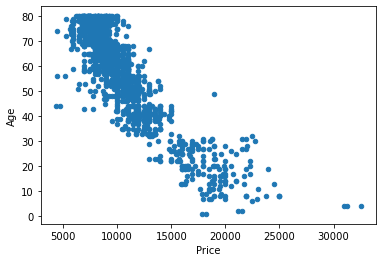

In [49]:
surveys= pd.read_csv("ToyotaCorolla.csv")
my_plt=surveys.plot("Price","Age",kind="scatter")
plt.show()

In [51]:
%matplotlib inline

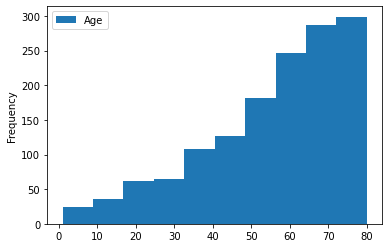

In [53]:
surveys= pd.read_csv("ToyotaCorolla.csv")
my_plt=surveys.plot("Price","Age",kind="hist")
plt.show()

In [ ]:
Gran parte del potencial de Python reside en su capacidad en las fases previas al
análisis de datos, es decir, lectura del raw data y depuración del mismo.

En esta serie nos centraremos en la lectura de datos en diversos formatos (ficheros
planos, otras extensiones y bases de datos relacionales).

Ficheros planos

Son ficheros de texto que almacenan registros (filas de características o atributos).
En la primera fila podemos encontrar una cabecera con el nombre de cada una de las
características o atributos.

Existen dos extensiones: .csv (valores separados por comas) y .txt (los valores pueden
estar separados por coma, espacio, tabulador…).
    
Hagamos un breve recordatorio sobre el uso de librerías en Python. Para usar una
función de una librería específica, previamente hemos de cargar la librería mediante
import. Para hacer la llamada a dicha función usaremos:
nombre_librería.nombre_función() o bien alias_librería.nombre_función().

Otro aspecto a tener en cuenta es que los archivos a importar han de estar en el
directorio de trabajo actual. Si no recordamos su ubicación, podemos comprobarlo:

In [56]:
import os

In [59]:
os.getcwd()

'C:\\Users\\eduma\\OneDrive\\Documentos\\Python-Analisis de negocio con Big Data'

In [ ]:
Repeticion con cars.txt y cars.csv

In [6]:
import numpy as np
import pandas as pd

In [10]:
file='cars.txt'
data=np.loadtxt(file,dtype='str',delimiter=',',skiprows=1,usecols=[0,1,2])
data

array([['1984', 'Alfa Romeo', 'Spider Veloce 2000'],
       ['1984', 'Bertone', 'X1/9'],
       ['1984', 'Chevrolet', 'Corvette'],
       ...,
       ['2019', 'Volvo', 'S90 AWD PHEV'],
       ['2019', 'Volvo', 'XC60 AWD PHEV'],
       ['2019', 'Volvo', 'XC90 AWD PHEV']], dtype='<U47')

In [13]:
file='cars.txt'
data2=np.loadtxt(file,delimiter=',',skiprows=1,dtype=bytes,usecols=[0,1,2]).astype(str)
data2

array([['1984', 'Alfa Romeo', 'Spider Veloce 2000'],
       ['1984', 'Bertone', 'X1/9'],
       ['1984', 'Chevrolet', 'Corvette'],
       ...,
       ['2019', 'Volvo', 'S90 AWD PHEV'],
       ['2019', 'Volvo', 'XC60 AWD PHEV'],
       ['2019', 'Volvo', 'XC90 AWD PHEV']], dtype='<U47')

In [34]:
file='cars.csv'
data3=np.genfromtxt(file,delimiter=',',names=True,dtype=object,usecols=[0,1,2,4])
data3

array([(b'1984', b'Alfa Romeo', b'Spider Veloce 2000', b'25'),
       (b'1984', b'Bertone', b'X1/9', b'26'),
       (b'1984', b'Chevrolet', b'Corvette', b'20'), ...,
       (b'2019', b'Volvo', b'S90 AWD PHEV', b'33'),
       (b'2019', b'Volvo', b'XC60 AWD PHEV', b'28'),
       (b'2019', b'Volvo', b'XC90 AWD PHEV', b'27')],
      dtype=[('ï»¿year', 'O'), ('make', 'O'), ('model', 'O'), ('hwy_mpg', 'O')])

In [35]:
file='cars.csv'
data4=np.recfromcsv(file,usecols=[0,1,2,4])
data4[:3]

rec.array([(1984, b'Alfa Romeo', b'Spider Veloce 2000', 25),
           (1984, b'Bertone', b'X1/9', 26),
           (1984, b'Chevrolet', b'Corvette', 20)],
          dtype=[('ï»¿year', '<i4'), ('make', 'S34'), ('model', 'S47'), ('hwy_mpg', '<i4')])

In [36]:
file='cars.csv'
data5=pd.read_csv(file,nrows=4)
data5.head()

,year,make,model,city_mpg,hwy_mpg,comb_mpg,cylinder,drive_type,expected_annual_fuel_cost,fuel_type,transmission,vehicle_class
0,1984,Alfa Romeo,Spider Veloce 2000,18,25,21,4,NaN,2050,Regular,Manual 5-spd,Two Seaters
1,1984,Bertone,X1/9,20,26,22,4,NaN,1950,Regular,Manual 5-spd,Two Seaters
2,1984,Chevrolet,Corvette,13,20,15,8,NaN,2850,Regular,Automatic 4-spd,Two Seaters
3,1984,Chevrolet,Corvette,13,20,15,8,NaN,2850,Regular,Manual 4-spd,Two Seaters


In [37]:
data5.mean(axis=0,numeric_only=True)

year                         1984.00
city_mpg                       16.00
hwy_mpg                        22.75
comb_mpg                       18.25
cylinder                        6.00
drive_type                       NaN
expected_annual_fuel_cost    2425.00
dtype: float64

In [39]:
#Resumen estadístico con pandas
dataframe=pd.DataFrame(data5)
dataframe

,year,make,model,city_mpg,hwy_mpg,comb_mpg,cylinder,drive_type,expected_annual_fuel_cost,fuel_type,transmission,vehicle_class
0,1984,Alfa Romeo,Spider Veloce 2000,18,25,21,4,NaN,2050,Regular,Manual 5-spd,Two Seaters
1,1984,Bertone,X1/9,20,26,22,4,NaN,1950,Regular,Manual 5-spd,Two Seaters
2,1984,Chevrolet,Corvette,13,20,15,8,NaN,2850,Regular,Automatic 4-spd,Two Seaters
3,1984,Chevrolet,Corvette,13,20,15,8,NaN,2850,Regular,Manual 4-spd,Two Seaters


In [40]:
dataframe.describe()

,year,city_mpg,hwy_mpg,comb_mpg,cylinder,drive_type,expected_annual_fuel_cost
count,4.0,4.000000,4.000000,4.000000,4.000000,0.0,4.00000
mean,1984.0,16.000000,22.750000,18.250000,6.000000,NaN,2425.00000
std,0.0,3.559026,3.201562,3.774917,2.309401,NaN,492.44289
min,1984.0,13.000000,20.000000,15.000000,4.000000,NaN,1950.00000
25%,1984.0,13.000000,20.000000,15.000000,4.000000,NaN,2025.00000
50%,1984.0,15.500000,22.500000,18.000000,6.000000,NaN,2450.00000
75%,1984.0,18.500000,25.250000,21.250000,8.000000,NaN,2850.00000
max,1984.0,20.000000,26.000000,22.000000,8.000000,NaN,2850.00000


In [41]:
import matplotlib.pyplot as plt

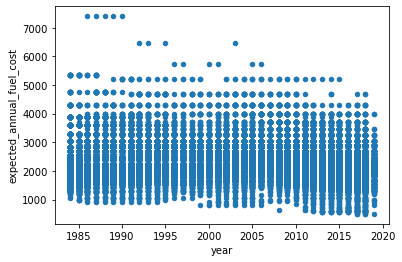

In [44]:
surveys= pd.read_csv("cars.csv")
my_plt=surveys.plot("year","expected_annual_fuel_cost",kind="scatter")
plt.show()

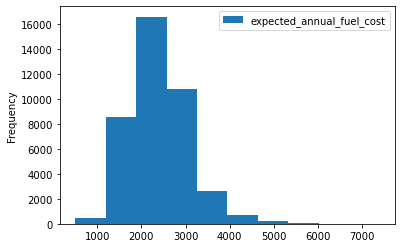

In [45]:
surveys= pd.read_csv("cars.csv")
my_plt=surveys.plot("year","expected_annual_fuel_cost",kind="hist")
plt.show()